# Estilos para gráficas

Se generó una serie de estilos genéricos para ser utilizados en la visualización de datos. Es posible que en ciertos contextos específicos no sean utilizados y se recurra a soluciones particulares.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib as mpl
import numpy as np

## Colores base

In [2]:
#Vector de colores base
designC = {
    "vr" : "#9DD3A4",
    "az" : "#304059",
    "nr" : "#F56522",
    "cs" : "#3997D4",
    "gr" : "#989FAF"
    }

In [3]:
cnList = list(designC.keys())
bcList = list(designC.values())
cnList, bcList

(['vr', 'az', 'nr', 'cs', 'gr'],
 ['#9DD3A4', '#304059', '#F56522', '#3997D4', '#989FAF'])

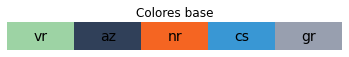

In [6]:
#Visualizando colores base
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
mplC = mpl.colors.ListedColormap(bcList, name = "baseColors")
norm = mpl.colors.Normalize(vmin=5, vmax=10)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mplC),
             cax=ax, orientation='horizontal', label='Some Units')
xps = np.arange(5.5,10.5,1)
for count, i in np.ndenumerate(xps):
    cbar.ax.text(i, 0.5, cnList[count[0]], ha='center', va='center', fontsize=14, color='black')
plt.axis('off')
plt.title("Colores base")
plt.show()

## Tonos discretos

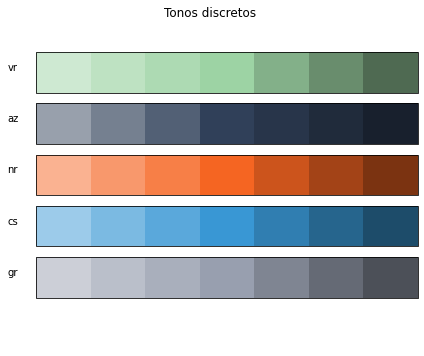

In [10]:
#Creación de 7 tonos discretos para cada color base
plt.axis
fig, ax = plt.subplots(nrows = 6, ncols = 1, figsize=(6, 5))
norm = mpl.colors.Normalize(vmin=5, vmax=10)
dcDic = {}
dcDic2 = {}

for c, i in enumerate(cnList):
    cmap = clr.LinearSegmentedColormap.from_list('custom blue', ["#FFFFFF",designC[i],"#000000"], N=13)
    dcDic2[i] = cmap
    num_centers = 7
    start_index = (cmap.N - num_centers) // 2
    end_index = start_index + num_centers - 1
    indices = np.linspace(start_index/cmap.N, end_index/cmap.N, num_centers)
    center_colors = cmap(indices)
    #print(center_colors)
    cmap = clr.LinearSegmentedColormap.from_list('custom blue', center_colors, N=len(center_colors))

    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                 cax=ax[c], orientation='horizontal')#, label='Some Units'
    ax[c].xaxis.set_tick_params(labelbottom=False)
    ax[c].set_xticks([])
    title = ax[c].set_ylabel(i, rotation=0, labelpad=20)
    plt.axis('off')
    #Guardando cmap en diccionario
    dcDic[i] = cmap
    
fig.subplots_adjust(bottom=0)
fig.suptitle('Tonos discretos ')
fig.tight_layout(rect=[0, 0, 1, 0.95])

## Tonos continuos

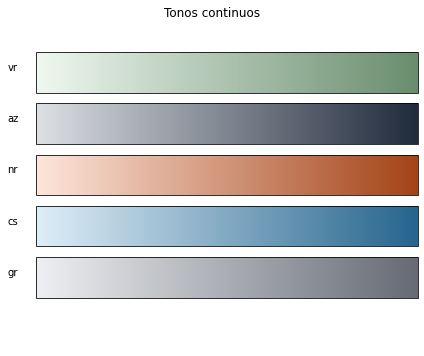

In [21]:
#Tonos continuos
plt.axis
fig, ax = plt.subplots(nrows = 6, ncols = 1, figsize=(6, 5))
norm = mpl.colors.Normalize(vmin=5, vmax=10)

ccDic = {}

for c, i in enumerate(list(dcDic2.keys())):
    cmap = clr.LinearSegmentedColormap.from_list('custom blue', [dcDic2[i](1),dcDic2[i](8)], N=255)
    ccDic[i] = cmap
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                 cax=ax[c], orientation='horizontal')#, label='Some Units'
    ax[c].xaxis.set_tick_params(labelbottom=False)
    ax[c].set_xticks([])
    title = ax[c].set_ylabel(i, rotation=0, labelpad=20)
    plt.axis('off')

fig.subplots_adjust(bottom=0)
fig.suptitle('Tonos continuos')
fig.tight_layout(rect=[0, 0, 1, 0.95])
